# A304_SRO_NGO_Hall_125K_p1T_to_n1T

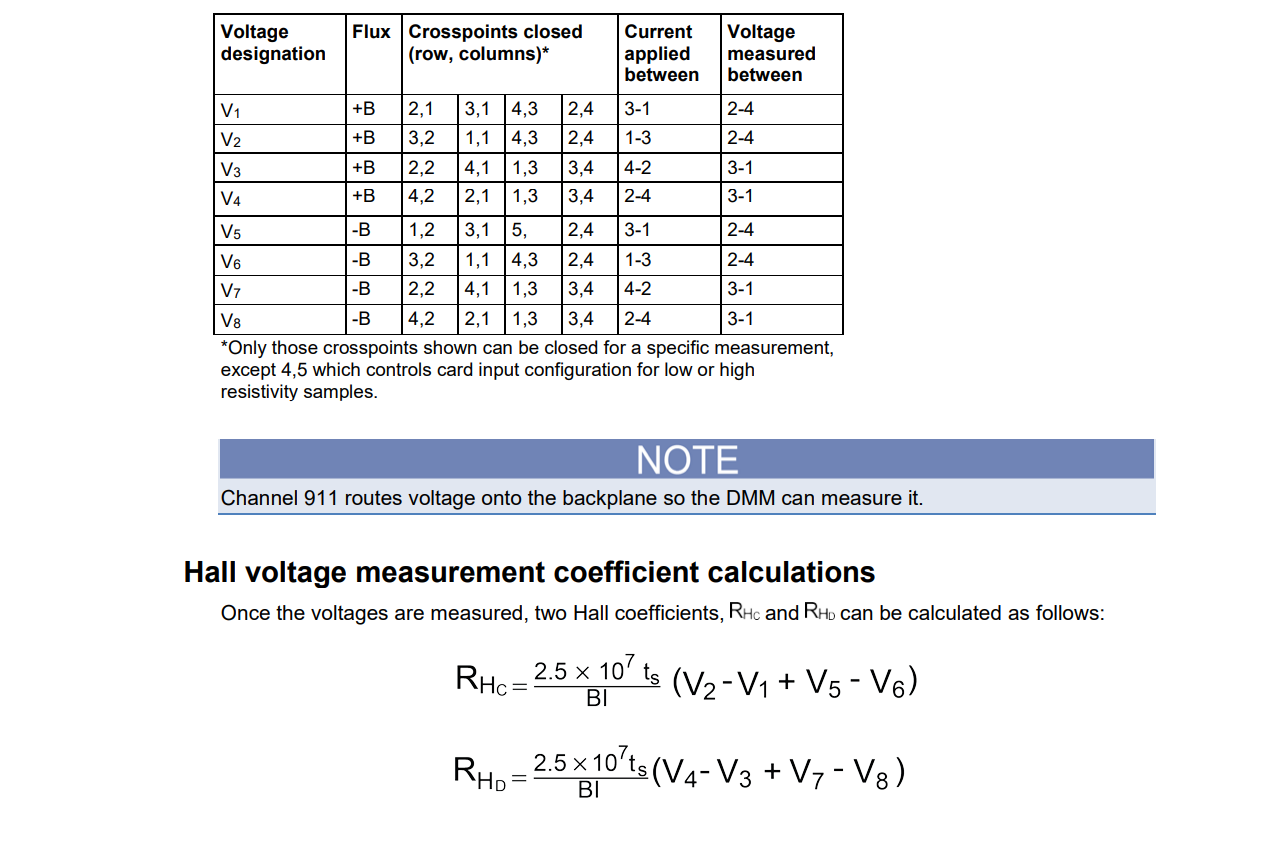

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [9]:
filename='C:\\Users\\Admin\\Desktop\\Data\\7_june_2023\\A304_SRO_NGO_Hall_125K_p1T_n1T.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value'])
df['multiplier'] = 10**6
df
# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,0.148582,125.105234,601.811614,-601.682185,-600.269320,600.177871,9.172000e-07,1000000
1,0.001,500.396515,125.005641,604.877245,-604.940097,-596.494096,596.497601,8.220000e-07,1000000
2,0.001,1000.400360,125.000359,609.804544,-609.873323,-590.378361,590.369666,7.724000e-07,1000000
3,0.001,1500.609052,124.999777,613.103428,-613.135720,-584.968019,584.999853,7.813000e-07,1000000
4,0.001,2000.550909,125.000029,612.423207,-612.414976,-582.810747,582.839197,7.663000e-07,1000000
...,...,...,...,...,...,...,...,...,...
78,0.001,6000.241846,125.000713,603.435417,-603.434531,-577.988877,578.033809,6.523000e-07,1000000
79,0.001,7000.450439,125.000482,601.809038,-601.810737,-576.958281,577.015260,6.466000e-07,1000000
80,0.001,8000.345410,125.000517,600.192843,-600.192124,-575.976502,576.016478,6.461000e-07,1000000
81,0.001,9000.522998,125.000571,598.568230,-598.569513,-575.002176,575.025659,6.414000e-07,1000000


### Converting B to integer B

In [10]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [11]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,0.148582,0,125.105234,601.811614,-601.682185,-600.269320,600.177871,9.172000e-07,1000000
1,0.001,500.396515,500,125.005641,604.877245,-604.940097,-596.494096,596.497601,8.220000e-07,1000000
2,0.001,1000.400360,1000,125.000359,609.804544,-609.873323,-590.378361,590.369666,7.724000e-07,1000000
3,0.001,1500.609052,1500,124.999777,613.103428,-613.135720,-584.968019,584.999853,7.813000e-07,1000000
4,0.001,2000.550909,2000,125.000029,612.423207,-612.414976,-582.810747,582.839197,7.663000e-07,1000000


In [12]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

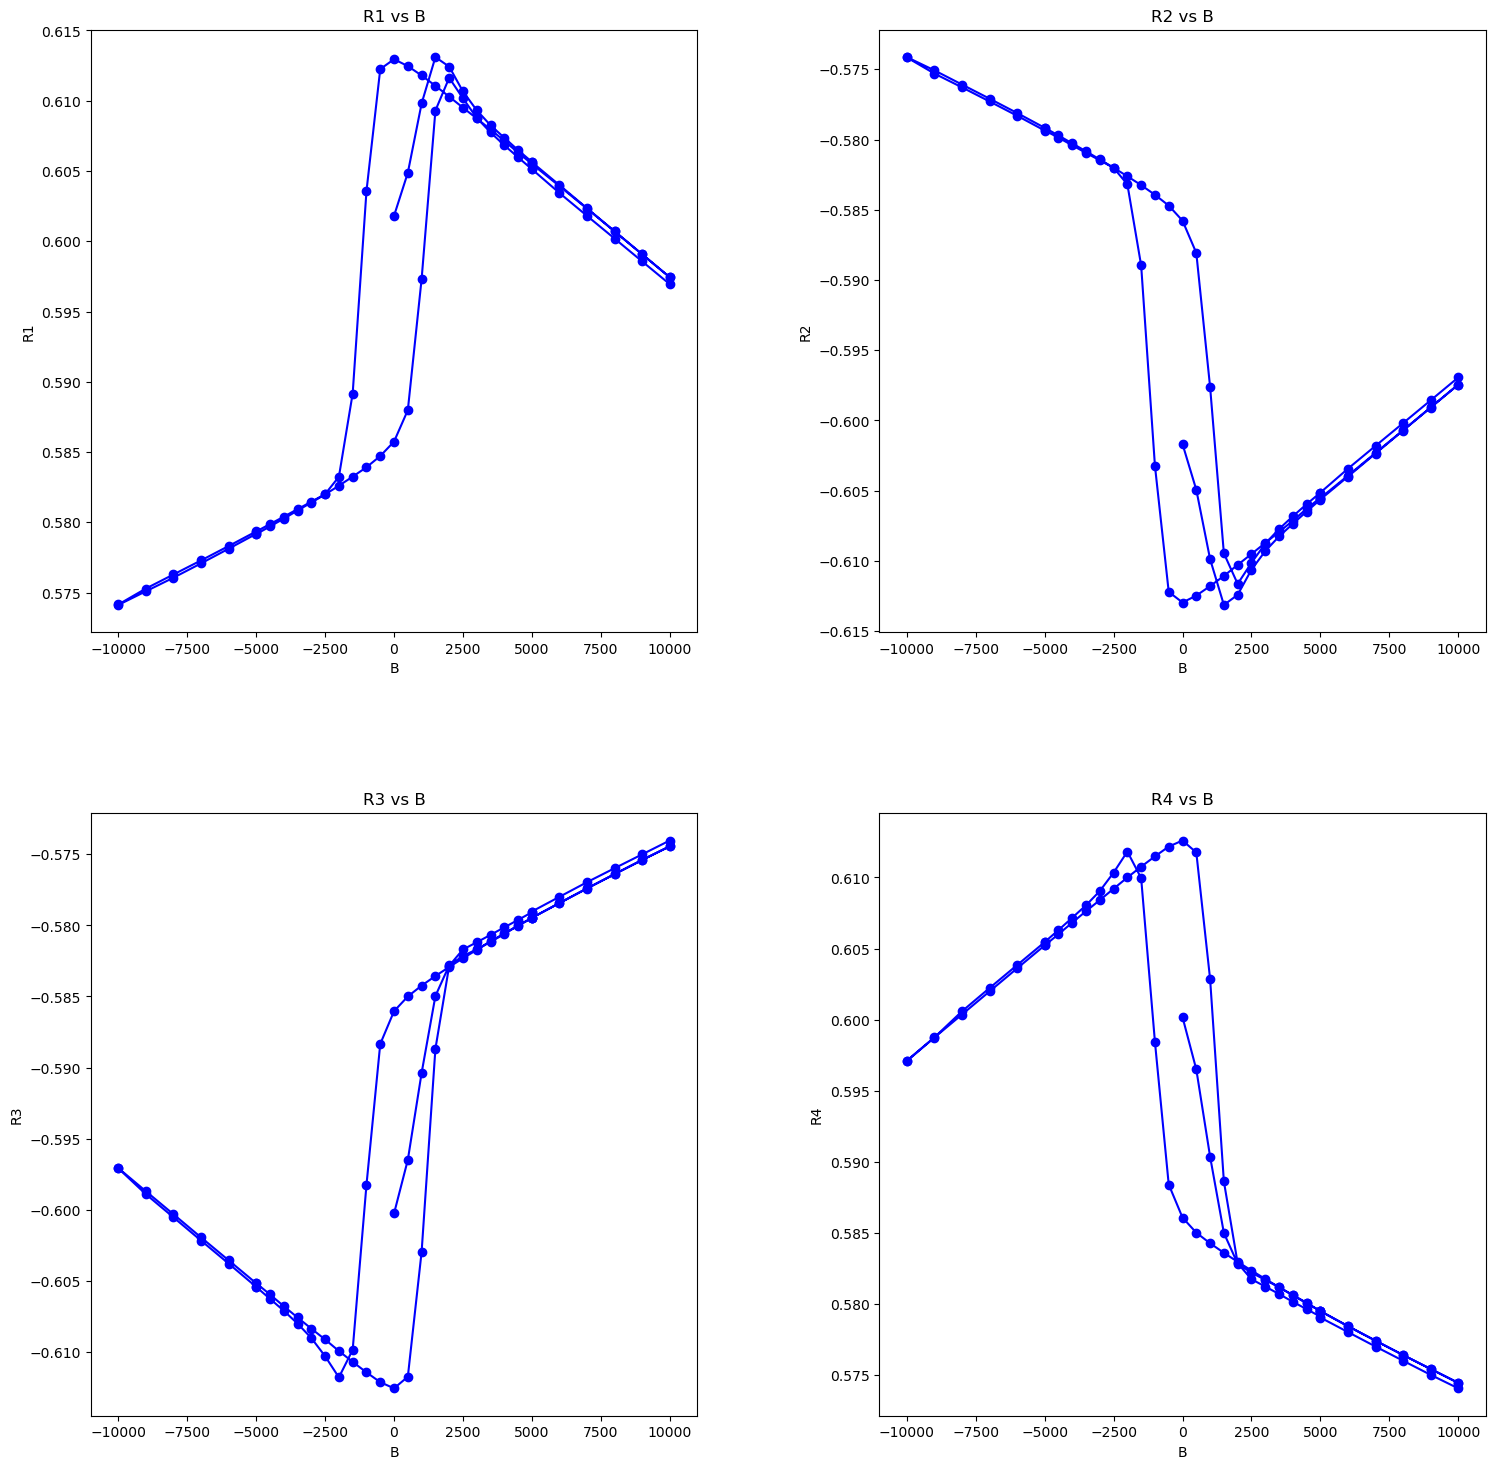

In [13]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [14]:
B_max = max(df['B_int'])
B_max_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_max:
        B_max_first_idx = i
        break
B_max_first_idx

16

In [15]:
df = df.iloc[B_max_first_idx+1:].copy()
df.reset_index(inplace = True, drop = True) # resetting index

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [16]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

10000 -10000


In [17]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

32

In [18]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [19]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.001,10000.283789,10000,125.000321,597.441161,-597.442439,-574.425127,574.461262,7.306000e-07,1000000
1,0.001,9000.534277,9000,125.000562,599.068015,-599.075548,-575.405530,575.443875,7.392000e-07,1000000
2,0.001,8000.363477,8000,125.000251,600.704519,-600.700044,-576.390544,576.416408,7.333000e-07,1000000
3,0.001,7000.464282,7000,124.999872,602.319121,-602.313382,-577.391967,577.427949,7.360000e-07,1000000
4,0.001,6000.422388,6000,125.000386,603.922457,-603.929641,-578.429798,578.440096,7.417000e-07,1000000


In [20]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
33,0.001,-10000.307471,-10000,124.999688,574.124945,-574.133225,-597.076810,597.088446,6.224000e-07,1000000
34,0.001,-9000.568555,-9000,125.000917,575.097953,-575.075080,-598.707142,598.743836,6.195000e-07,1000000
35,0.001,-8000.389624,-8000,125.000068,576.064349,-576.085116,-600.324759,600.363331,6.316000e-07,1000000
36,0.001,-7000.528076,-7000,125.000291,577.082462,-577.090298,-601.953050,601.987105,6.533000e-07,1000000
37,0.001,-6000.312207,-6000,124.999477,578.123757,-578.111857,-603.564005,603.608782,6.550000e-07,1000000


In [21]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [22]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,10000,125.000321,597.441161,-597.442439,-574.425127,574.461262,574.124945,-574.133225,-597.076810,597.088446,1000000
1,0.001,9000,125.000562,599.068015,-599.075548,-575.405530,575.443875,575.097953,-575.075080,-598.707142,598.743836,1000000
2,0.001,8000,125.000251,600.704519,-600.700044,-576.390544,576.416408,576.064349,-576.085116,-600.324759,600.363331,1000000
3,0.001,7000,124.999872,602.319121,-602.313382,-577.391967,577.427949,577.082462,-577.090298,-601.953050,601.987105,1000000
4,0.001,6000,125.000386,603.922457,-603.929641,-578.429798,578.440096,578.123757,-578.111857,-603.564005,603.608782,1000000


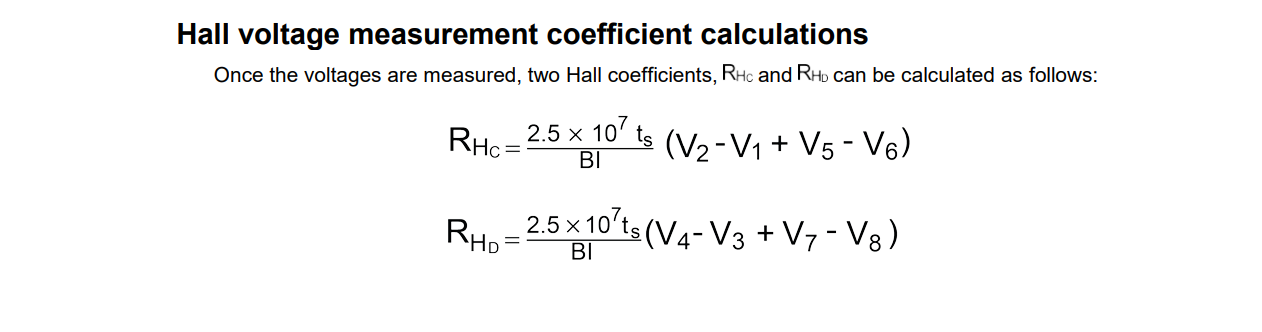
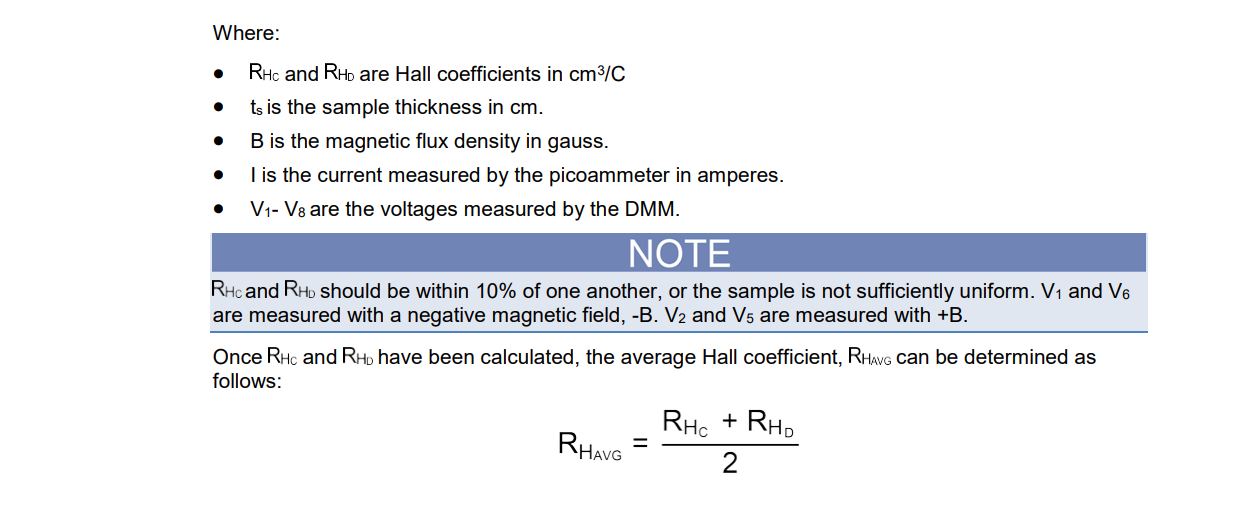

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [23]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

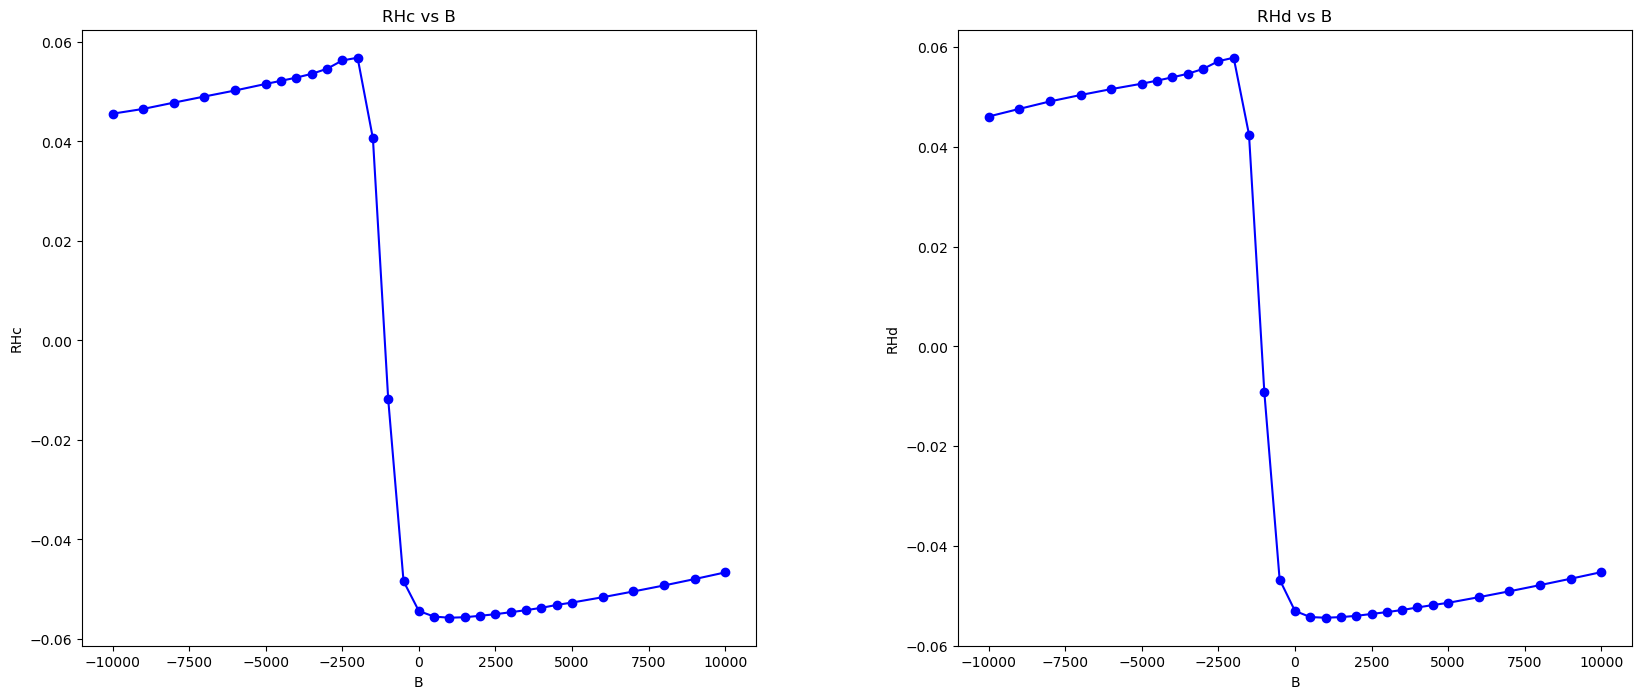

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

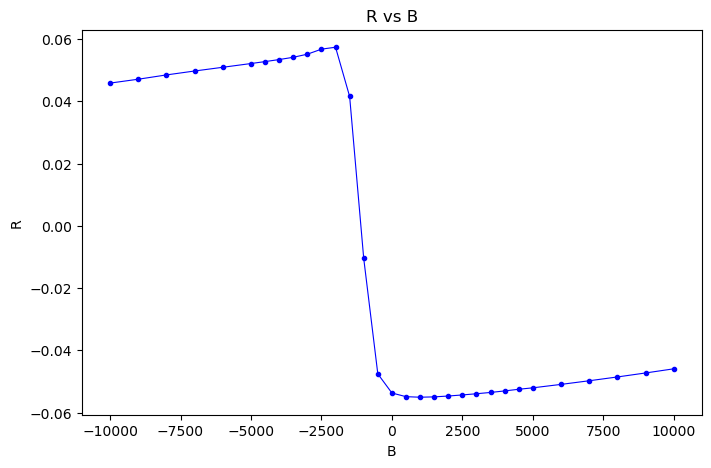

In [25]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [26]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.001,-10000,124.999688,574.124945,-574.133225,-597.076810,597.088446,597.441161,-597.442439,-574.425127,574.461262,1000000
1,0.001,-9000,125.000917,575.097953,-575.075080,-598.707142,598.743836,599.068015,-599.075548,-575.405530,575.443875,1000000
2,0.001,-8000,125.000068,576.064349,-576.085116,-600.324759,600.363331,600.704519,-600.700044,-576.390544,576.416408,1000000
3,0.001,-7000,125.000291,577.082462,-577.090298,-601.953050,601.987105,602.319121,-602.313382,-577.391967,577.427949,1000000
4,0.001,-6000,124.999477,578.123757,-578.111857,-603.564005,603.608782,603.922457,-603.929641,-578.429798,578.440096,1000000


### Hall resistance calculation

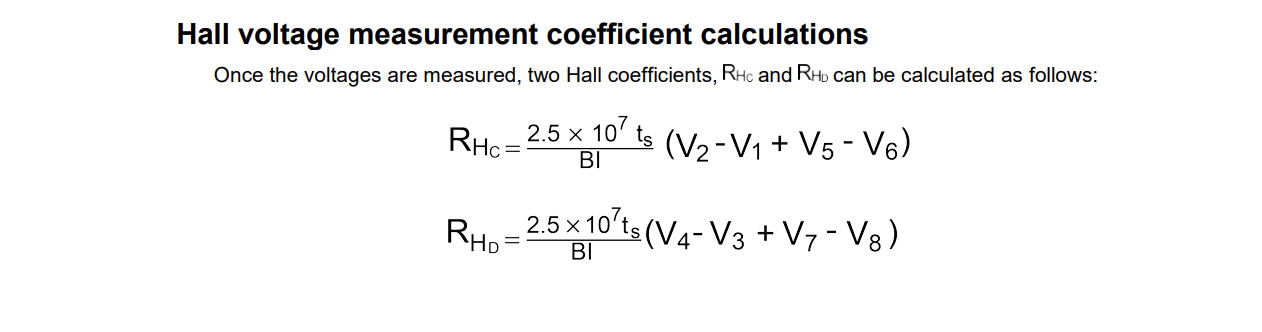

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [27]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

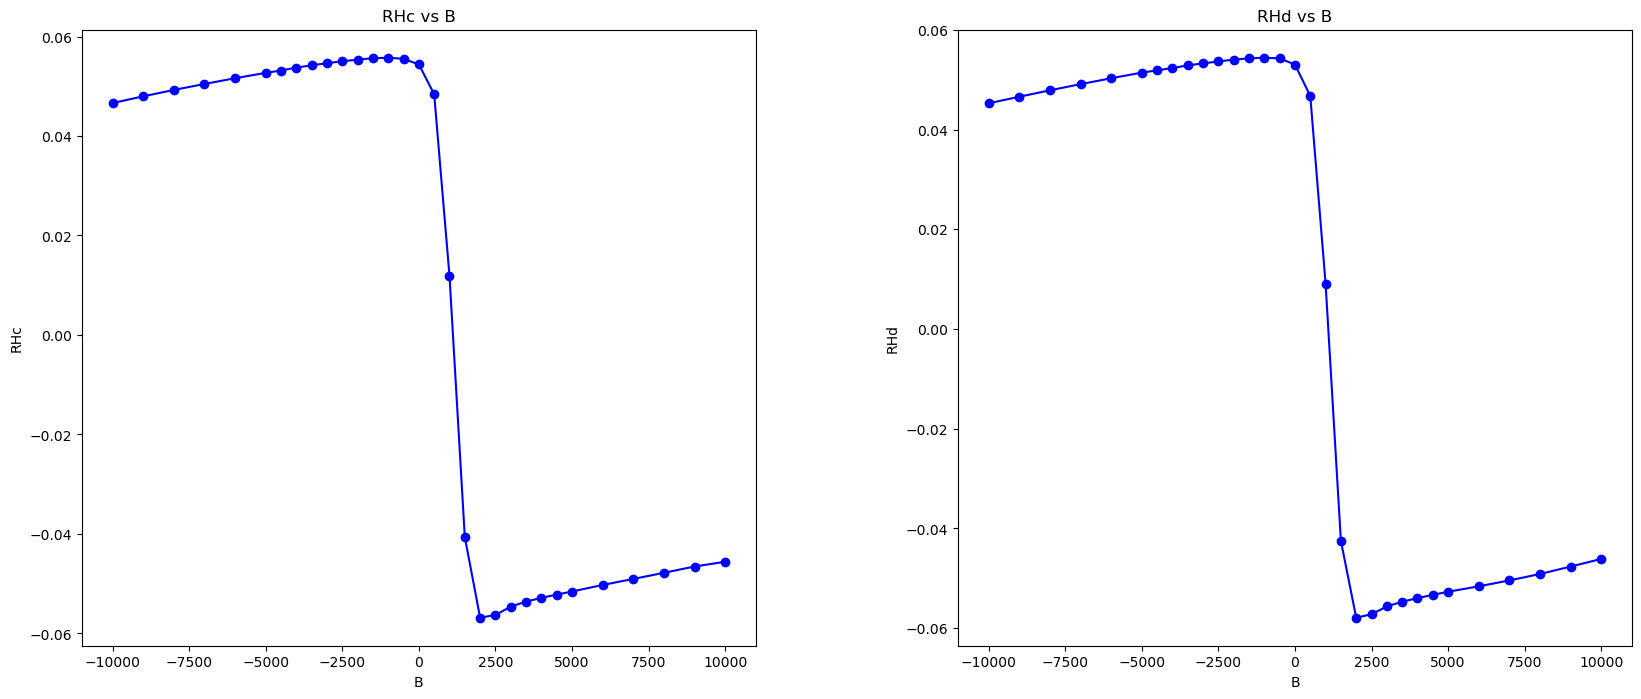

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

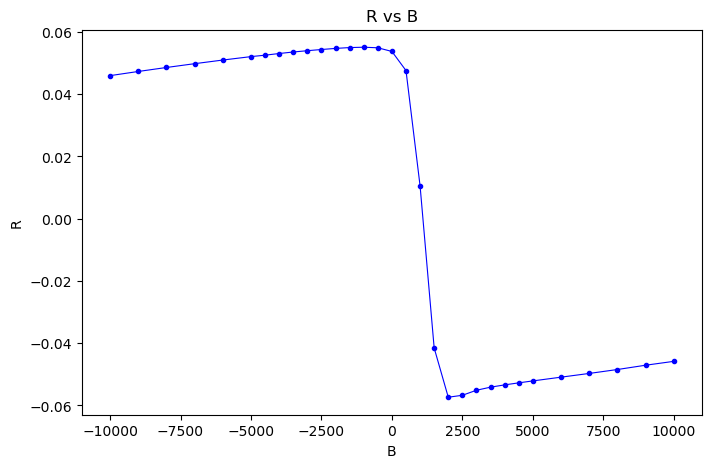

In [29]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

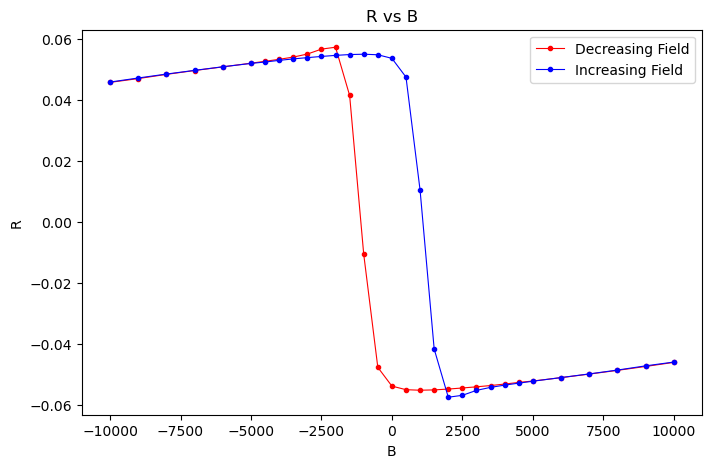

In [30]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()